# **Titanic Survival Prediction**

**Dataset Link:** https://www.kaggle.com/competitions/titanic/data


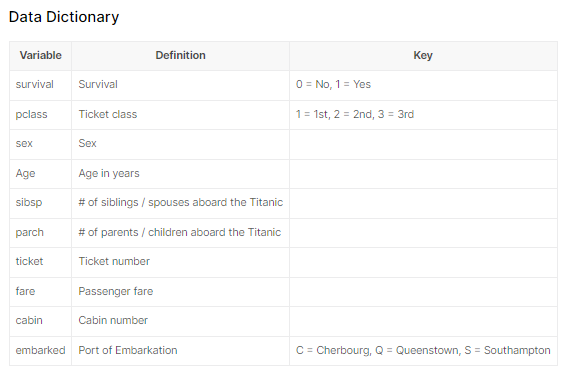

In [71]:
# import required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn import metrics
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score,precision_score,recall_score,classification_report,f1_score

import warnings
from warnings import filterwarnings
filterwarnings("ignore") 

import pickle
sns.set()

In [2]:
# Load the dataset
df = pd.read_csv("/content/train.csv")

In [3]:
# Display the first 5 records
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [5]:
df.shape

(891, 12)

In [6]:
# Statistical Analysis of Data 
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
# Checking missing values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### **Separate Categorical and Numerical Features**

**1. Categorical Columns**

In [9]:
cat_col = [clm for clm in df.columns if df[clm].dtype == "O"]
cat_col

['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']

In [10]:
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [11]:
df[cat_col].isnull().sum()

Name          0
Sex           0
Ticket        0
Cabin       687
Embarked      2
dtype: int64

In [12]:
Categorical = df[cat_col]
Categorical 

,Name,Sex,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,NaN,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,NaN,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,NaN,S
...,...,...,...,...,...
886,"Montvila, Rev. Juozas",male,211536,NaN,S
887,"Graham, Miss. Margaret Edith",female,112053,B42,S
888,"Johnston, Miss. Catherine Helen ""Carrie""",female,W./C. 6607,NaN,S
889,"Behr, Mr. Karl Howell",male,111369,C148,C


In [13]:
# drop unwanted columns
# drop Name and Ticket column from categorical data

Categorical.drop(columns = ["Name","Ticket"],axis = 1,inplace = True)


In [14]:
Categorical.head()

,Sex,Cabin,Embarked
0,male,NaN,S
1,female,C85,C
2,female,NaN,S
3,female,C123,S
4,male,NaN,S


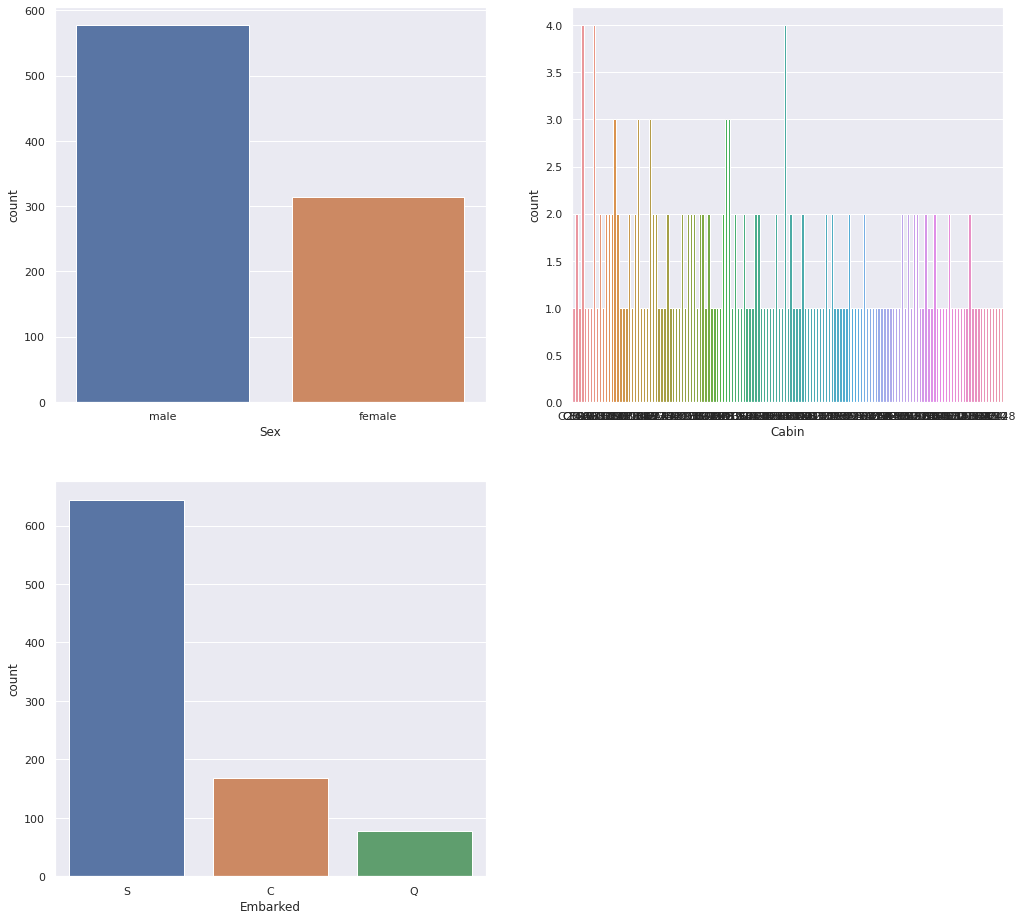

In [15]:
plt.figure(figsize=(17,16))
plotnumber = 1

for column in Categorical:
  if plotnumber <= 4:
    ax = plt.subplot(2,2,plotnumber)
    sns.countplot(Categorical[column])
    plt.xlabel(column)
  plotnumber+=1
plt.show()

In [16]:
# filing the missing values
Categorical["Cabin"] = Categorical["Cabin"].fillna(Categorical["Cabin"].mode()[0])
Categorical["Embarked"] = Categorical["Embarked"].fillna(Categorical["Embarked"].mode()[0])

In [17]:
Categorical.isnull().sum()

Sex         0
Cabin       0
Embarked    0
dtype: int64

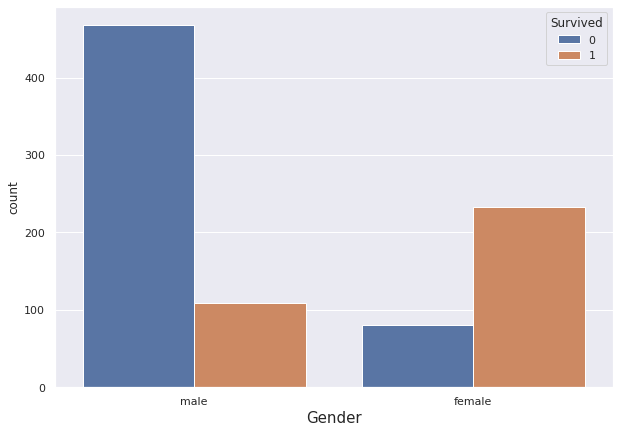

In [18]:
## Gender

plt.figure(figsize = (10,7))
sns.countplot(data=df,x='Sex',hue='Survived')
plt.xlabel("Gender",fontsize = 15)
plt.show()

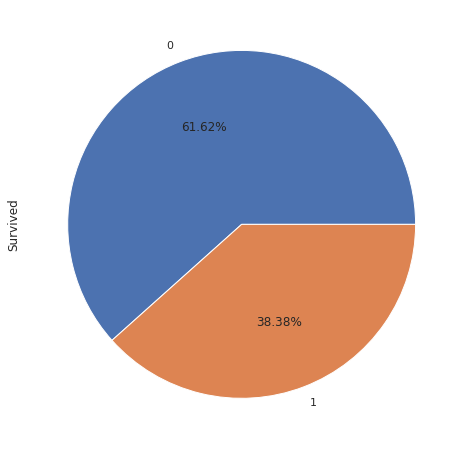

In [19]:
plt.figure(figsize=(8,8))
df['Survived'].value_counts().plot(kind='pie',autopct='%0.2f%%')
plt.show()

In [20]:
# More men than women had strokes
df.groupby('Sex').mean()[['Age', 'Survived']]

,Age,Survived
Sex,,
female,27.915709,0.742038
male,30.726645,0.188908


**Applying Label Encoder for Encoding Categorical Data**

In [21]:
Categorical.columns

Index(['Sex', 'Cabin', 'Embarked'], dtype='object')

In [22]:
lr = LabelEncoder()

In [23]:
columns_labelencoder = ['Sex', 'Cabin', 'Embarked']

In [24]:
Categorical[columns_labelencoder].head()

,Sex,Cabin,Embarked
0,male,B96 B98,S
1,female,C85,C
2,female,B96 B98,S
3,female,C123,S
4,male,B96 B98,S


In [25]:
for clm in columns_labelencoder:
  Categorical[clm] = lr.fit_transform(Categorical[clm]) 

In [26]:
Categorical.head()

,Sex,Cabin,Embarked
0,1,47,2
1,0,81,0
2,0,47,2
3,0,55,2
4,1,47,2


**2. Numerical Columns**

In [27]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [28]:
Num_col = [clm for clm in df.columns if df[clm].dtype != "O"]
Num_col

['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

In [29]:
df[Num_col].head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [30]:
df[Num_col].isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Age            177
SibSp            0
Parch            0
Fare             0
dtype: int64

In [31]:
df[Num_col].shape

(891, 7)

In [32]:
Numerical = df[Num_col]
Numerical.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [33]:
# filling the Missing Values

Numerical["Age"] = Numerical["Age"].fillna(Numerical["Age"].mean())

In [34]:
Numerical.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Age            0
SibSp          0
Parch          0
Fare           0
dtype: int64

In [35]:
Numerical.shape

(891, 7)

In [36]:
# Drop PassengerId column from Numerical

Numerical.drop(columns = ["PassengerId"],axis=1,inplace = True)

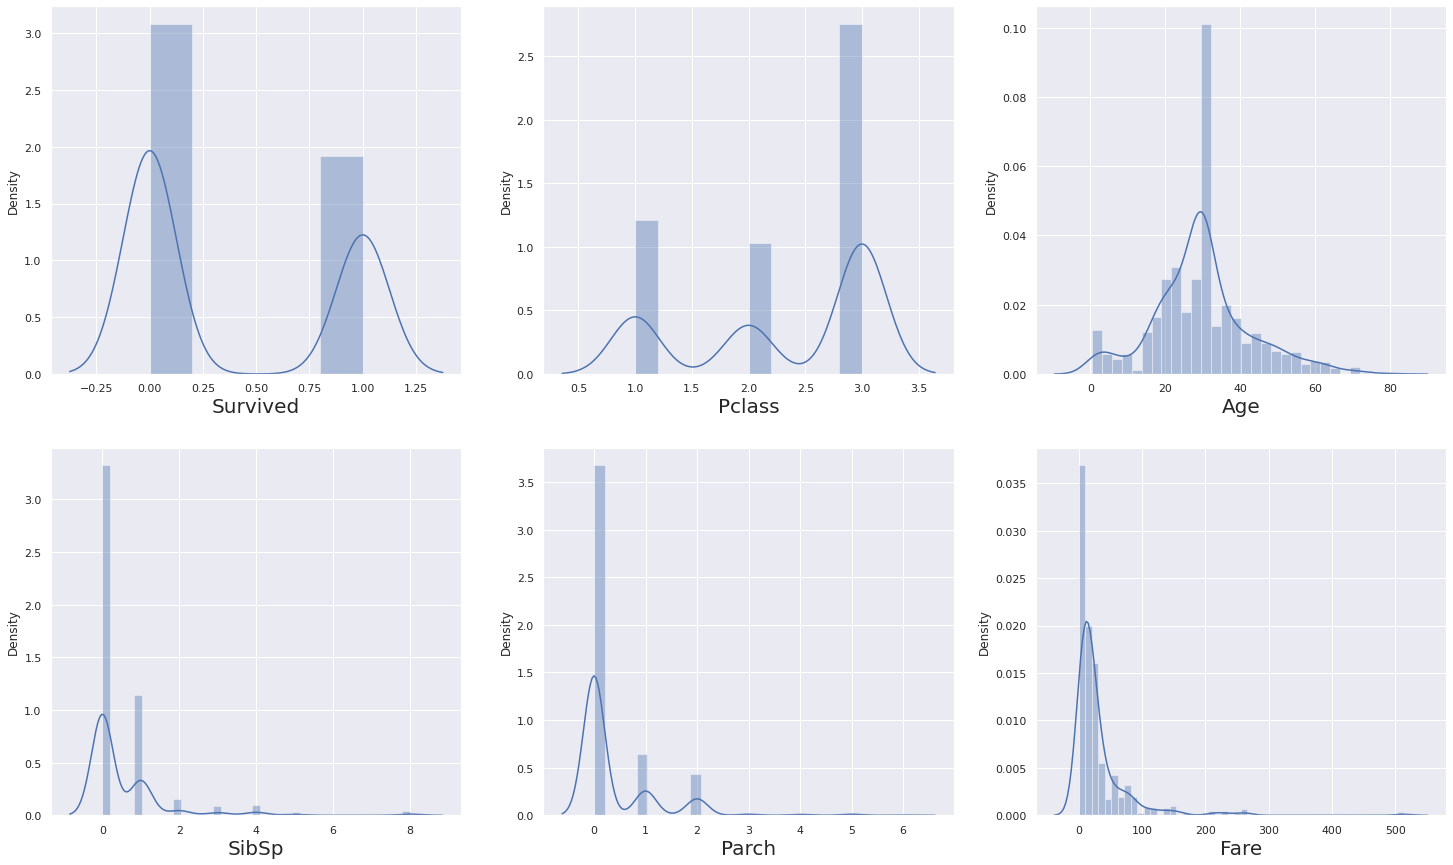

In [37]:
plt.figure(figsize=(25,23))
plotnumber = 1

for column in Numerical:
  if plotnumber <= 8:
    ax = plt.subplot(3,3,plotnumber)
    sns.distplot(Numerical[column])
    plt.xlabel(column,fontsize = 20)
  plotnumber+=1
plt.show()

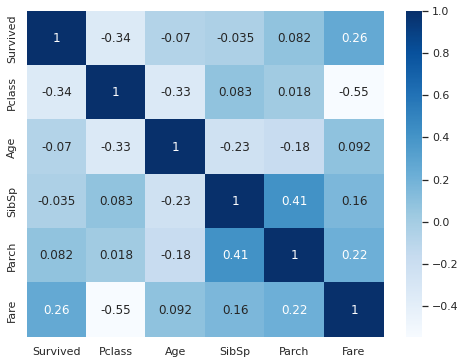

In [38]:
# constructing a heatmap to understand the correlation

plt.figure(figsize=(8,6))
sns.heatmap(Numerical.corr(), cmap='Blues',annot = True)

### **Concatenate Categorical and Numerical**

In [39]:
data = pd.concat([Categorical,Numerical],axis=1)
data.head()

,Sex,Cabin,Embarked,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,47,2,0,3,22.0,1,0,7.2500
1,0,81,0,1,1,38.0,1,0,71.2833
2,0,47,2,1,3,26.0,0,0,7.9250
3,0,55,2,1,1,35.0,1,0,53.1000
4,1,47,2,0,3,35.0,0,0,8.0500


In [40]:
data.shape

(891, 9)

In [41]:
data.describe()

,Sex,Cabin,Embarked,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.647587,53.639731,1.536476,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.477990,23.568293,0.791503,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,47.000000,1.000000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,1.000000,47.000000,2.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,1.000000,47.000000,2.000000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,146.000000,2.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Sex       891 non-null    int64  
 1   Cabin     891 non-null    int64  
 2   Embarked  891 non-null    int64  
 3   Survived  891 non-null    int64  
 4   Pclass    891 non-null    int64  
 5   Age       891 non-null    float64
 6   SibSp     891 non-null    int64  
 7   Parch     891 non-null    int64  
 8   Fare      891 non-null    float64
dtypes: float64(2), int64(7)
memory usage: 62.8 KB


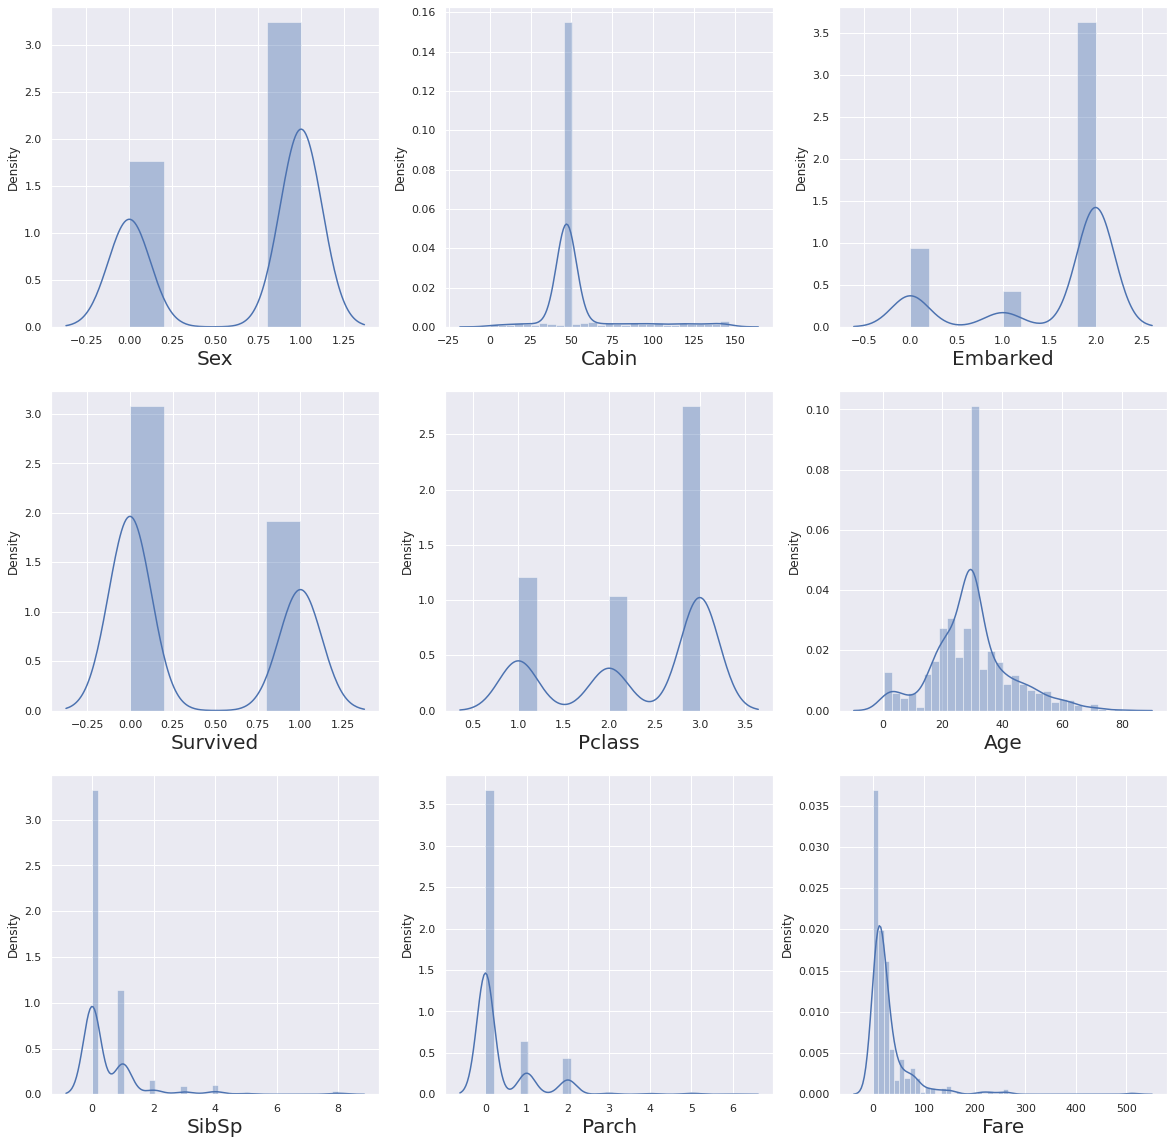

In [43]:
plt.figure(figsize=(20,20))
plotnumber = 1

for column in data:
  if plotnumber <= 10:
    ax = plt.subplot(3,3,plotnumber)
    sns.distplot(data[column])
    plt.xlabel(column,fontsize = 20)
  plotnumber+=1
plt.show()

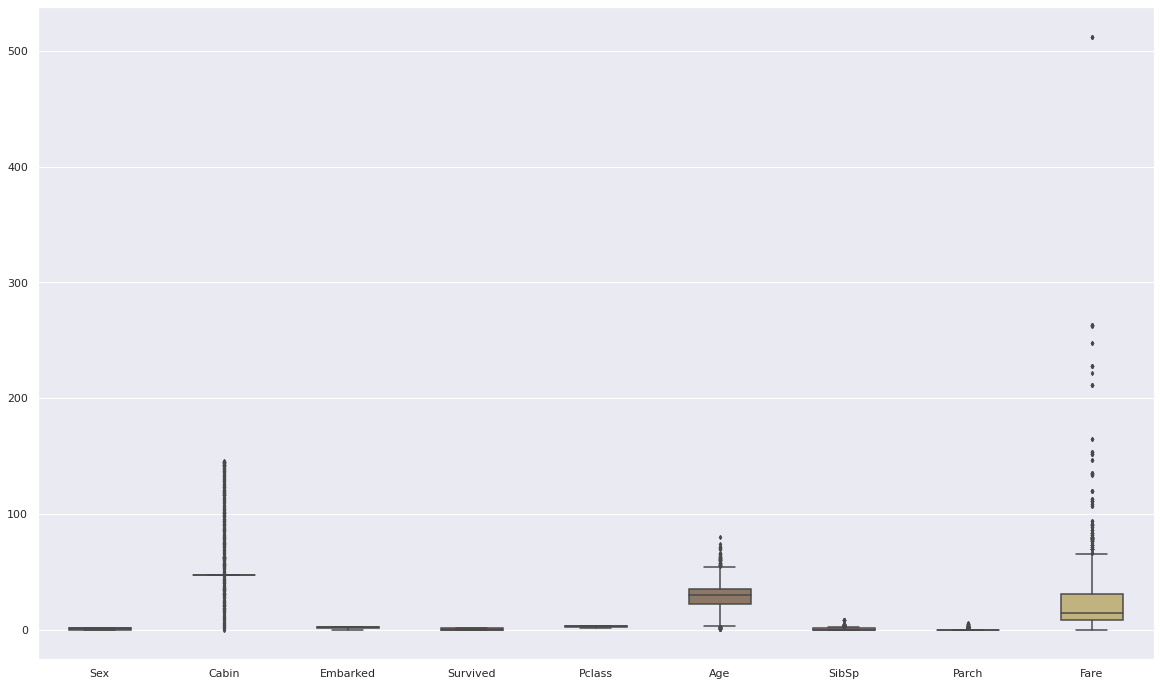

In [44]:
fig,ax = plt.subplots(figsize = (20,12))
sns.boxplot(data=data,width = 0.5,fliersize = 3,ax=ax)

<Figure size 1440x1440 with 0 Axes>

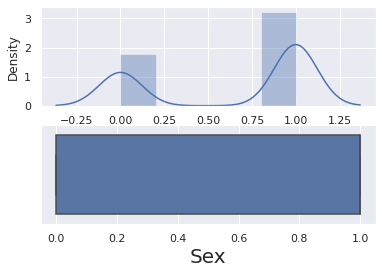

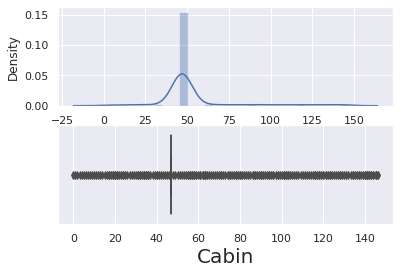

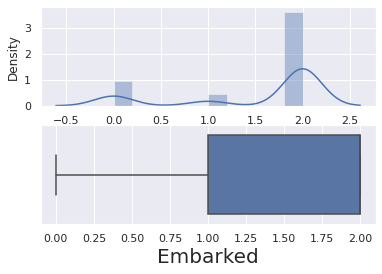

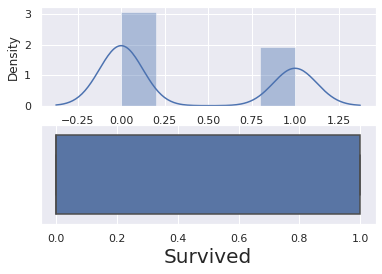

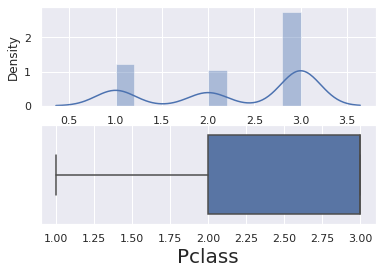

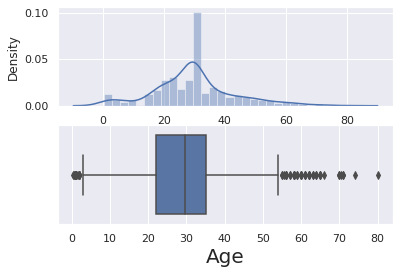

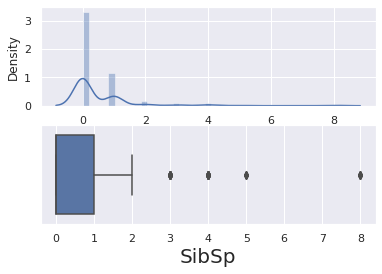

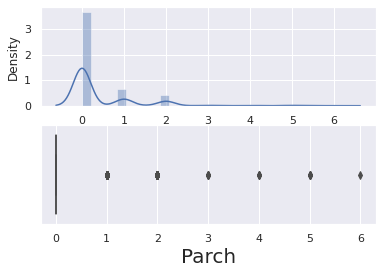

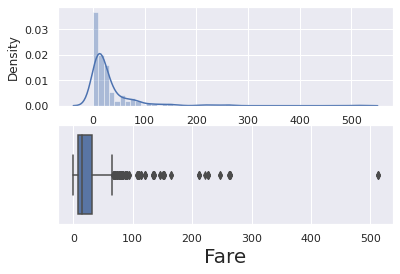

In [45]:
plt.figure(figsize=(20,20))
plotnumber = 1

for column in data:
  if plotnumber <= 10:
    #ax = plt.subplot(5,2,plotnumber)
    fig,(ax1,ax2)=plt.subplots(2,1) #Subplot 
    sns.distplot(data[column],ax=ax1) #distplot
    sns.boxplot(data[column],ax=ax2) #boxplot
    plt.xlabel(column,fontsize = 20)
  plotnumber+=1
plt.show()

**Dealing with Outliers**

In [46]:
data['Fare']=np.where(data['Fare']>=500,data['Fare'].median(),data['Fare'])

In [47]:
data['Age']=np.where(data['Age']>=70,data['Age'].median(),data['Age'])

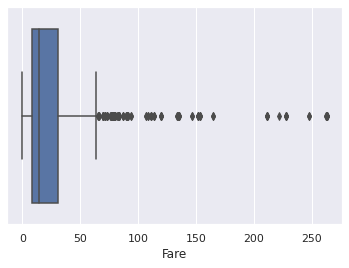

In [48]:
sns.boxplot(data["Fare"])

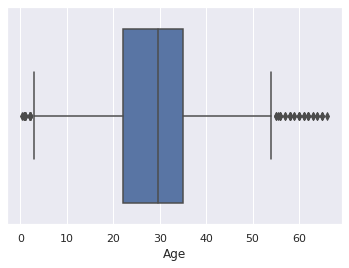

In [49]:
sns.boxplot(data["Age"])

In [50]:
data["Fare"] = np.log(data["Fare"])
data["Fare"]

0      1.981001
1      4.266662
2      2.070022
3      3.972177
4      2.085672
         ...   
886    2.564949
887    3.401197
888    3.154870
889    3.401197
890    2.047693
Name: Fare, Length: 891, dtype: float64

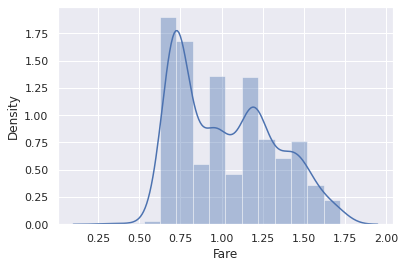

In [51]:
# apply log transformation to the attribute
data['Fare'] = np.log(data['Fare'])
sns.distplot(data["Fare"])

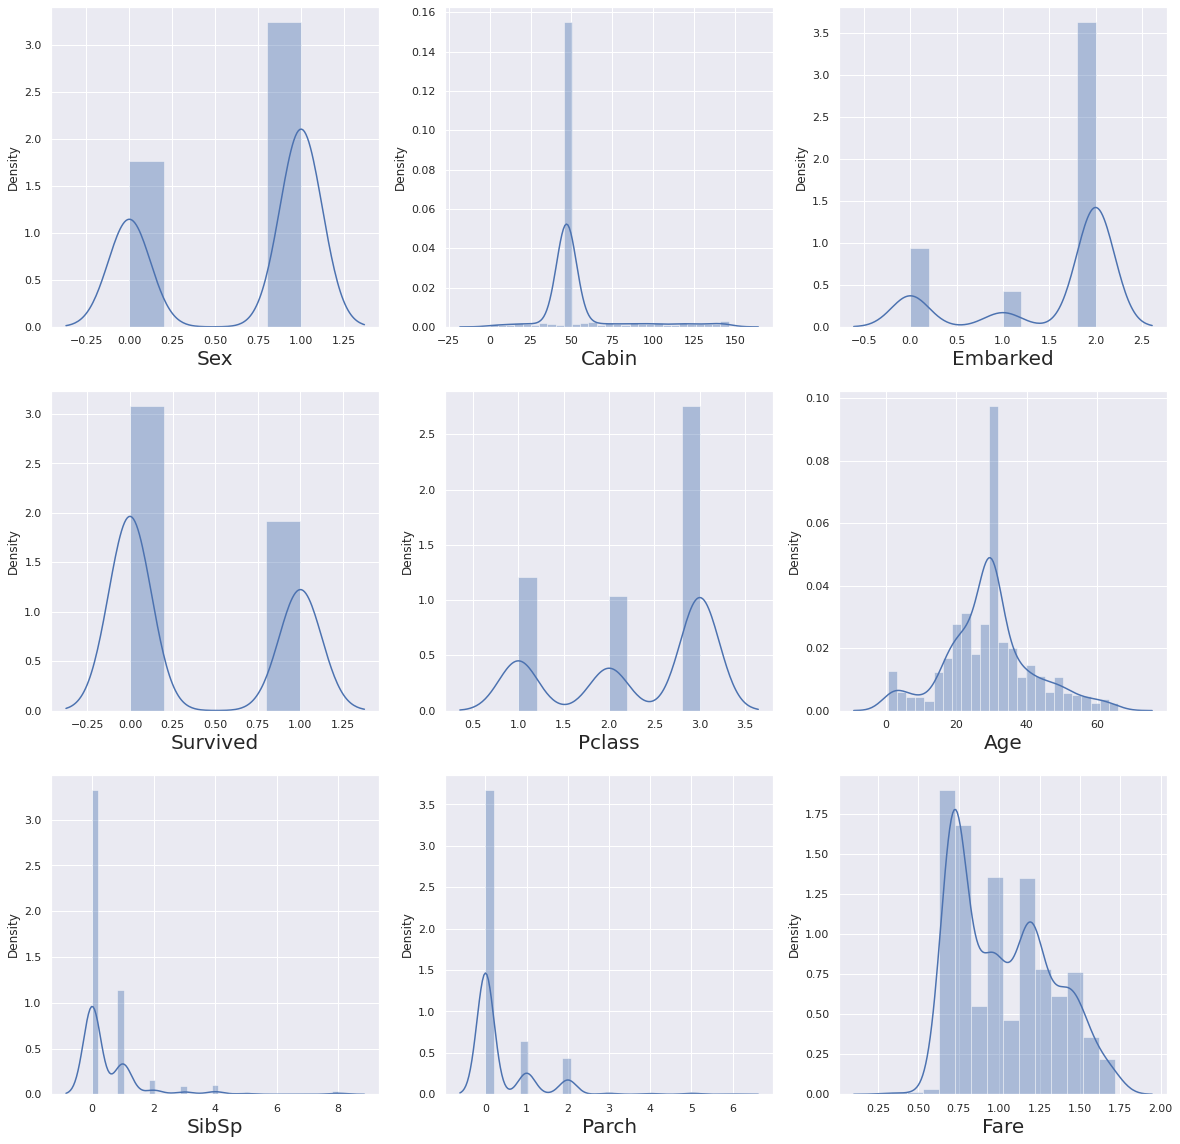

In [52]:
plt.figure(figsize=(20,20))
plotnumber = 1

for column in data:
  if plotnumber <= 10:
    ax = plt.subplot(3,3,plotnumber)
    sns.distplot(data[column])
    plt.xlabel(column,fontsize = 20)
  plotnumber+=1
plt.show()

In [53]:
data.corr()

,Sex,Cabin,Embarked,Survived,Pclass,Age,SibSp,Parch,Fare
Sex,1.000000,-0.102643,0.108262,-0.543351,0.131900,0.068118,-0.114631,-0.245489,-0.259140
Cabin,-0.102643,1.000000,0.023804,0.175690,-0.248495,0.084004,-0.005539,0.022682,0.200975
Embarked,0.108262,0.023804,1.000000,-0.167675,0.162098,-0.020258,0.068230,0.039798,-0.143692
Survived,-0.543351,0.175690,-0.167675,1.000000,-0.338481,-0.061067,-0.035322,0.081629,0.319887
Pclass,0.131900,-0.248495,0.162098,-0.338481,1.000000,-0.327061,0.083081,0.018443,-0.750079
Age,0.068118,0.084004,-0.020258,-0.061067,-0.327061,1.000000,-0.233806,-0.179159,0.115179
SibSp,-0.114631,-0.005539,0.068230,-0.035322,0.083081,-0.233806,1.000000,0.414838,0.357587
Parch,-0.245489,0.022682,0.039798,0.081629,0.018443,-0.179159,0.414838,1.000000,0.365172
Fare,-0.259140,0.200975,-0.143692,0.319887,-0.750079,0.115179,0.357587,0.365172,1.000000


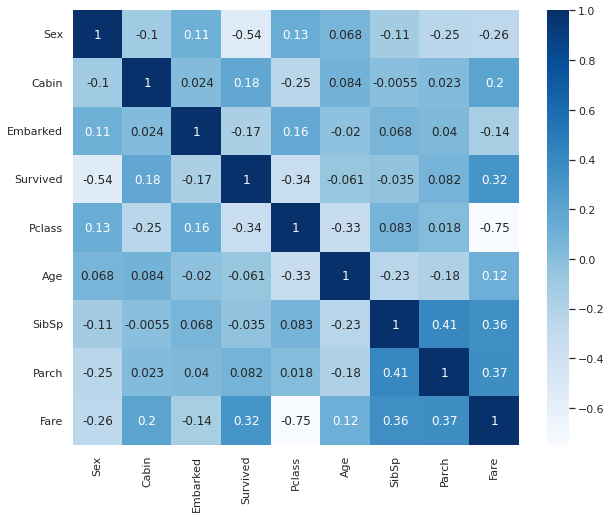

In [54]:
# constructing a heatmap to understand the correlation

plt.figure(figsize=(10,8))
sns.heatmap(data.corr(), cmap='Blues',annot = True)

In [55]:
data.isnull().sum()

Sex          0
Cabin        0
Embarked     0
Survived     0
Pclass       0
Age          0
SibSp        0
Parch        0
Fare        15
dtype: int64

In [56]:
data["Fare"] = data["Fare"].fillna(data["Fare"].mean())

In [57]:
data.isnull().sum().sum()

0

**Split Independent and Dependent Features**

In [58]:
data.columns

Index(['Sex', 'Cabin', 'Embarked', 'Survived', 'Pclass', 'Age', 'SibSp',
       'Parch', 'Fare'],
      dtype='object')

In [59]:
X = data.drop(columns = ["Survived"],axis=1)
y = data["Survived"]

In [60]:
X.head()

,Sex,Cabin,Embarked,Pclass,Age,SibSp,Parch,Fare
0,1,47,2,3,22.0,1,0,0.683603
1,0,81,0,1,38.0,1,0,1.450832
2,0,47,2,3,26.0,0,0,0.727559
3,0,55,2,1,35.0,1,0,1.379314
4,1,47,2,3,35.0,0,0,0.735091


In [61]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [62]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [63]:
X_scaled

array([[ 0.73769513, -0.28188124,  0.58595414, ...,  0.43279337,
        -0.47367361, -1.18245683],
       [-1.35557354,  1.16154512, -1.9423032 , ...,  0.43279337,
        -0.47367361,  1.43484701],
       [-1.35557354, -0.28188124,  0.58595414, ..., -0.4745452 ,
        -0.47367361, -1.0325036 ],
       ...,
       [-1.35557354, -0.28188124,  0.58595414, ...,  0.43279337,
         2.00893337,  0.40500743],
       [ 0.73769513,  0.27001707, -1.9423032 , ..., -0.4745452 ,
        -0.47367361,  0.66147463],
       [ 0.73769513, -0.28188124, -0.67817453, ..., -0.4745452 ,
        -0.47367361, -1.06950221]])

In [64]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = X_scaled

# we create a new data frame which will include all the VIFs
# note that each variable has its own variance inflation factor as this measure is variable specific (not model specific)
# we do not include categorical values for mulitcollinearity as they do not provide much information as numerical ones do
vif = pd.DataFrame()

# here we make use of the variance_inflation_factor, which will basically output the respective VIFs 
vif["VIF"] = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]
# Finally, I like to include names so it is easier to explore the result
vif["Features"] = X.columns

In [65]:
vif

,VIF,Features
0,1.125059,Sex
1,1.077609,Cabin
2,1.058178,Embarked
3,3.959283,Pclass
4,1.199369,Age
5,1.719485,SibSp
6,1.530596,Parch
7,4.656914,Fare


Here, we have the correlation values for all the features. As a thumb rule, a VIF value greater than 5 means a very severe multicollinearity. We don't any VIF greater than 5 , so we are good to go.

Great. Let's go ahead and use linear regression and see how good it fits our data. But first. let's split our data in train and test.

In [66]:
# split the dataset into training and Testing data

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25,random_state = 10)

In [67]:
print("Shape of X Train: ",X_train.shape)
print("Shape of X Test: ",X_test.shape)
print("Shape of y Train: ",y_train.shape)
print("Shape of y Test: ",y_test.shape)

Shape of X Train:  (668, 8)
Shape of X Test:  (223, 8)
Shape of y Train:  (668,)
Shape of y Test:  (223,)


**Model Building**

In [68]:
def ML_model(model):
  #model = LogisticRegression()
  model.fit(X_train,y_train)

  y_pred = model.predict(X_test)
# print(y_pred)

# Accuracy,F1_Score, Precision_Score,Recall_Score
  print("Confusion Matrix :\n ",(confusion_matrix(y_test,y_pred)))
  print()
  print("Accuracy_Score: ", round(accuracy_score(y_test,y_pred)*100,3),"%")
  print()
  print("F1 Score: ", (f1_score(y_test,y_pred)))
  print("Precision Score: ", (precision_score(y_test,y_pred)))
  print("Recall Score :", (recall_score(y_test,y_pred)))
  print("AUC Score :", roc_auc_score(y_test,y_pred))
  print("\n")
#Entire Report of the Model
  print("Entire Report of the Model: \n", (classification_report(y_test,y_pred)))
  plt.show()

In [72]:
ML_model(LogisticRegression())

Confusion Matrix :
  [[131  16]
 [ 22  54]]

Accuracy_Score:  82.96 %

F1 Score:  0.7397260273972601
Precision Score:  0.7714285714285715
Recall Score : 0.7105263157894737
AUC Score : 0.8008413891872539


Entire Report of the Model: 
               precision    recall  f1-score   support

           0       0.86      0.89      0.87       147
           1       0.77      0.71      0.74        76

    accuracy                           0.83       223
   macro avg       0.81      0.80      0.81       223
weighted avg       0.83      0.83      0.83       223



In [73]:
classification = ML_model(DecisionTreeClassifier())
classification

Confusion Matrix :
  [[120  27]
 [ 19  57]]

Accuracy_Score:  79.372 %

F1 Score:  0.7124999999999999
Precision Score:  0.6785714285714286
Recall Score : 0.75
AUC Score : 0.7831632653061225


Entire Report of the Model: 
               precision    recall  f1-score   support

           0       0.86      0.82      0.84       147
           1       0.68      0.75      0.71        76

    accuracy                           0.79       223
   macro avg       0.77      0.78      0.78       223
weighted avg       0.80      0.79      0.80       223



In [77]:
classification1= ML_model(RandomForestClassifier())
classification1

Confusion Matrix :
  [[130  17]
 [ 22  54]]

Accuracy_Score:  82.511 %

F1 Score:  0.7346938775510203
Precision Score:  0.7605633802816901
Recall Score : 0.7105263157894737
AUC Score : 0.7974400286430362


Entire Report of the Model: 
               precision    recall  f1-score   support

           0       0.86      0.88      0.87       147
           1       0.76      0.71      0.73        76

    accuracy                           0.83       223
   macro avg       0.81      0.80      0.80       223
weighted avg       0.82      0.83      0.82       223



In [75]:
ML_model(KNeighborsClassifier())

Confusion Matrix :
  [[128  19]
 [ 29  47]]

Accuracy_Score:  78.475 %

F1 Score:  0.6619718309859155
Precision Score:  0.7121212121212122
Recall Score : 0.618421052631579
AUC Score : 0.7445846759756535


Entire Report of the Model: 
               precision    recall  f1-score   support

           0       0.82      0.87      0.84       147
           1       0.71      0.62      0.66        76

    accuracy                           0.78       223
   macro avg       0.76      0.74      0.75       223
weighted avg       0.78      0.78      0.78       223



**Save the Model**

In [79]:
# save the model

# save the model to the local file system
filename = 'finalized_model.pickle'
pickle.dump(classification1,open(filename,'wb'))